# DATA SCIENCE PROJECT – CALORIE_BURNT_PREDICTION

<h1 style="color:#00008B">TEAM MEMBERS :-</h1>
<p></p>
1) ADARSH R NAIR(AM.EN.U4CSE20102)

2) BOLLEPALLI RAVI CHANDU(AM.EN.U4CSE20117)

3) GUTTAPATI RUSHIKESH REDDY(AM.EN.U4CSE20131)

4) K.K.VENKATA KESAVA SATHVIK(AM.EN.U4CSE20137)

5) G.V.S KOUSHIK (AM.EN.U4CSE20173)

<h1 style="color:#00008B">PROBLEM DEFINITION</h1>
<p> </p>
<ul style = "color:#8B0000;">
  <li>In this project we are determining how many calories a person has burnt depending on certain attributes like duration of work out and body_temp and so on.We done all the required things like data preprocessing for cleaning the data data visualization for understanding the data and also we applied severeal algorithms to predict how many calories are burnt.</li>
</ul>.

<h2 style="color:#800080">Description :</h2>
<ul style = "color:#8B0000;">
  <li> Dataset used in the project represents approximately 15000 samples of each individuals with their corresponding IDS</li>
  <li>The data set has 9 different columns representing the concentration of different elements and approximately 15000 rows.</li>
  <li>The Dependent variable is named as column "Calories" both in the training and testing sets:</li>
</ul>

<h1 style="color:#00008B">IMPORTING NECESSARY LIBRARIES</h1>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

<h1 style="color:#00008B">DATA LOADING</h1>

<h2 style="color:#800080">Description :</h2>
<ul style = "color:#8B0000;">
  <li>Declared a Variable "path1" , "path1" contains the link of the csv file</li>
  <li>Created a DataFrame "data"</li>
  <li>priniing the DataFrame "data"</li>
</ul>

In [103]:
path1="C:\\Users\\rushi\\Downloads\\data science\\NEW_PROJECT\\DETAILS1.csv"
data=pd.read_csv(path1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29,105,40.8,231
1,14861698,female,20,166.0,60.0,14,94,40.3,66
2,11179863,male,69,179.0,79.0,5,88,38.7,26
3,16180408,female,34,179.0,NaN,13,100,40.5,71
4,17771927,female,27,154.0,58.0,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11,92,40.4,45
14996,17212577,female,27,165.0,65.0,6,85,39.2,23
14997,17271188,female,43,159.0,58.0,16,90,40.1,75
14998,18643037,male,78,193.0,97.0,2,84,38.3,11


In [109]:
for col in data.columns:
    print(col)

User_ID
Gender
Age
Height
Weight
Duration
Heart_Rate
Body_Temp
Calories


<h1 style="color:#00008B"> DATA PREPROCESSING </h1>

<h2 style="color:#800080">Checking Sum of all Null Values in each column in the DataFrame  :</h2>
<ul style = "color:#8B0000;">
  <li>Checking whether null values exist in the dataset</li>
    <li> <p style="color:#000080;display:inline";>data.isnull().sum()</p> function is used to check sum of all null values in a column</li>    <li>priniing the DataFrame "data"</li>
</ul>

In [89]:
data.isnull().sum()

User_ID        0
Gender         0
Age            0
Height        11
Weight         9
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
dtype: int64


<font size=3>From this it is understood that the attributes that have null values are Height , Weight respectively</font>


<font size="5">Filling Missing values for weight using averaging in an age interval</font>

In [4]:
'''
import statistics
# storing the data for null weights and setting the nan values as zero 
NullWeight = data[data["Weight"].isnull()].replace(np.nan , 0) 

print("Before : \n ")
print(NullWeight)

data["Weight"] = data["Weight"].replace(np.nan , 0)  
# storing the data for null weights and setting the nan values as zero 

i = 0
for age in NullWeight['Age']:    # accessing each age 
    age = age // 10       # setting up the range for age
    age = age * 10
    ageRange = data[(data["Age"] >= age) & (data["Age"] <= age + 10)]  
    # collecting age interval for a given age
    
    ageRangeAverage = np.nanmean(ageRange["Weight"]) 
    # calculating the mean of the particular interval
    
    data["Weight"].iloc[i] = ageRangeAverage    # updating the mean inplace for the missing values in the main dataset
    NullWeight["Weight"].iloc[i] = ageRangeAverage
    i += 1
    
print("\nAfter:\n")
NullWeight  # displaying the updated result for the range of null dataset
'''

'\nimport statistics\n# storing the data for null weights and setting the nan values as zero \nNullWeight = data[data["Weight"].isnull()].replace(np.nan , 0) \n\nprint("Before : \n ")\nprint(NullWeight)\n\ndata["Weight"] = data["Weight"].replace(np.nan , 0)  \n# storing the data for null weights and setting the nan values as zero \n\ni = 0\nfor age in NullWeight[\'Age\']:    # accessing each age \n    age = age // 10       # setting up the range for age\n    age = age * 10\n    ageRange = data[(data["Age"] >= age) & (data["Age"] <= age + 10)]  \n    # collecting age interval for a given age\n    \n    ageRangeAverage = np.nanmean(ageRange["Weight"]) \n    # calculating the mean of the particular interval\n    \n    data["Weight"].iloc[i] = ageRangeAverage    # updating the mean inplace for the missing values in the main dataset\n    NullWeight["Weight"].iloc[i] = ageRangeAverage\n    i += 1\n    \nprint("\nAfter:\n")\nNullWeight  # displaying the updated result for the range of null da

<font size="5">Filling Missing values for Height and Weight  using averaging in an age interval</font>

In [5]:
'''
NullHeight = data[data["Height"].isnull()].replace(np.nan , 0) 
# storing the data for null heights and setting the nan values as zero 

print("Before : \n ")
print(NullHeight)
print(NullHeight.iloc[0:,0])
data["Height"] = data["Height"].replace(np.nan , 0) 
# storing the data for null heights and setting the nan values as zero



i = 0
for age in NullHeight['Age']:   # accessing each age 
    age = age // 10   # setting up the range for age
    age = age * 10
    ageRange = data[(data["Age"] >= age) & (data["Age"] <= age + 10)] 
    # collecting age interval for a given age
    
    ageRangeAverage = np.nanmean(ageRange["Height"])  # calculating the mean of the particular interval
    data["Height"].iloc[i] = ageRangeAverage   # updating the mean inplace for the missing values in the main dataset
    NullHeight["Height"].iloc[i] = ageRangeAverage
    i += 1
print("\nAfter:\n")
NullHeight  # displaying the updated result for the range of null dataset
'''

'\nNullHeight = data[data["Height"].isnull()].replace(np.nan , 0) \n# storing the data for null heights and setting the nan values as zero \n\nprint("Before : \n ")\nprint(NullHeight)\nprint(NullHeight.iloc[0:,0])\ndata["Height"] = data["Height"].replace(np.nan , 0) \n# storing the data for null heights and setting the nan values as zero\n\n\n\ni = 0\nfor age in NullHeight[\'Age\']:   # accessing each age \n    age = age // 10   # setting up the range for age\n    age = age * 10\n    ageRange = data[(data["Age"] >= age) & (data["Age"] <= age + 10)] \n    # collecting age interval for a given age\n    \n    ageRangeAverage = np.nanmean(ageRange["Height"])  # calculating the mean of the particular interval\n    data["Height"].iloc[i] = ageRangeAverage   # updating the mean inplace for the missing values in the main dataset\n    NullHeight["Height"].iloc[i] = ageRangeAverage\n    i += 1\nprint("\nAfter:\n")\nNullHeight  # displaying the updated result for the range of null dataset\n'

<h2 style="color:#800080">We Need to calculate Mean of the Column <span style="color:#000080;">Weight</span> and replace the Null values with the <span style="color:#000080;">Mean of the column</span>:</h2>
<ul style = "color:#8B0000;">
    <li> <span style="color:#000080;">mean_value</span> has mean of the data in the column <span style="color:#000080;">weight</span> </li>
    <li>Printing the First 5 Rows in the Data Frame <span style="color:#000080;">data</span></li>    
    <li>Now We Replacing all the Null Values in the column <span style="color:#000080;">Weight</span> with mean of the column <span style="color:#000080;">Weight</span></li>
    <li>Now We are Printing the First 5 Rows of Updated DataFrame</li>
</ul>

In [90]:
mean_value=data['Weight'].mean()
print(data.head(5))
data['Weight'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(data.head(5))

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0        29         105       40.8   
1  14861698  female   20   166.0    60.0        14          94       40.3   
2  11179863    male   69   179.0    79.0         5          88       38.7   
3  16180408  female   34   179.0     NaN        13         100       40.5   
4  17771927  female   27   154.0    58.0        10          81       39.8   

   Calories  
0       231  
1        66  
2        26  
3        71  
4        35  
Updated Dataframe:
    User_ID  Gender  Age  Height    Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0  94.00000        29         105       40.8   
1  14861698  female   20   166.0  60.00000        14          94       40.3   
2  11179863    male   69   179.0  79.00000         5          88       38.7   
3  16180408  female   34   179.0  74.96638        13         100       40.5   
4  17771927  female   27   154.0  58.00

<h2 style="color:#800080">We Need to calculate Mean of the Column <span style="color:#000080;">Height</span> and replace the Null values with the <span style="color:#000080;">Mean of the column</span>:</h2><ul style = "color:#8B0000;">
    <li> <span style="color:#000080;">mean_value</span> has mean of the data in the column <span style="color:#000080;">Height</span> </li>
    <li>Printing the First 5 Rows in the Data Frame <span style="color:#000080;">data</span></li>    
    <li>Now We Replacing all the Null Values in the column <span style="color:#000080;">Height</span> with mean of the column <span style="color:#000080;">Height</span></li>
    <li>Now We are Printing the First 5 Rows of Updated DataFrame <span style="color:#000080;">data</span></li>
</ul>

In [91]:
mean_value=data['Height'].mean()
print(data.head())
data['Height'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(data.head())

    User_ID  Gender  Age  Height    Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0  94.00000        29         105       40.8   
1  14861698  female   20   166.0  60.00000        14          94       40.3   
2  11179863    male   69   179.0  79.00000         5          88       38.7   
3  16180408  female   34   179.0  74.96638        13         100       40.5   
4  17771927  female   27   154.0  58.00000        10          81       39.8   

   Calories  
0       231  
1        66  
2        26  
3        71  
4        35  
Updated Dataframe:
    User_ID  Gender  Age  Height    Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0  94.00000        29         105       40.8   
1  14861698  female   20   166.0  60.00000        14          94       40.3   
2  11179863    male   69   179.0  79.00000         5          88       38.7   
3  16180408  female   34   179.0  74.96638        13         100       40.5   
4  17771927  female   27   

<h2 style="color:#800080">Checking Sum of all Null Values in each column in the DataFrame  :</h2>
<ul style = "color:#8B0000;">
  <li>Checking whether null values exist in the dataset</li>
    <li> <span style="color:#000080;">data.isnull().sum()</span> function is used to check sum of all null values in a column</li>    <li>priniting the DataFrame "data"</li>
</ul>

<h3 style="color:#800080"> Results Found After Replacing Missing Values :</h3>
<ul style = "color:#8B0000;">
    <li>We have Successfully Cleaned all The Missing Values with the <span style="color:#000080;">Mean</span></li>
</ul>

In [93]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<h2 style="color:#800080">Replacing <span style="color:#000080;">Male</span> with <span style="color:#000080;">0</span>
& Replacing <span style="color:#000080;">Female</span> with <span style="color:#000080;">1</span>

</h2>
<ul style = "color:#8B0000;">
  <li><span style="color:#000080;">data = data.replace("male" , 0) </span> Will Replace All the Male's with <span style="color:#000080;">0</span></li>
  <li><span style="color:#000080;">data = data.replace("female" , 1) </span> Will Replace All the Female's  with <span style="color:#000080;">1</span></li>
<li>priniting the DataFrame "data"</li>
</ul>

In [94]:
data = data.replace("male",0)
data = data.replace("female",1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.00000,29,105,40.8,231
1,14861698,1,20,166.0,60.00000,14,94,40.3,66
2,11179863,0,69,179.0,79.00000,5,88,38.7,26
3,16180408,1,34,179.0,74.96638,13,100,40.5,71
4,17771927,1,27,154.0,58.00000,10,81,39.8,35
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.00000,11,92,40.4,45
14996,17212577,1,27,165.0,65.00000,6,85,39.2,23
14997,17271188,1,43,159.0,58.00000,16,90,40.1,75
14998,18643037,0,78,193.0,97.00000,2,84,38.3,11


<h2 style="color:#800080"> We are Seperating the <span style="color:#000080;">Target Variable {"calories"}</span> From the Data Frame & Creating a New DataFrame <span style="color:#000080;">featureScores</span> which has the Data of scores of each Column
</h2>
<ul style = "color:#8B0000;">
  <li>Importing <span style="color:#000080;">SelectKBest & f_regression</span> From <span style="color:#000080;">sklearn.feature_selection</span></li>
  <li>Importing <span style="color:#000080;">chi2</span> From <span style="color:#000080;">sklearn.feature_selection</span></li>
  
  <li><span style="color:#000080;">variable X</span> has data from <span style="color:#000080;">Column 0 to 8</span></li>
  <li><span style="color:#000080;">variable Y</span> has <span style="color:#000080;">Column 9 {Target Variable}</span></li>
  <li><span style="color:#000080;">Using SelectKBest we are fitting the Values of X and Y</li>
  <li><span style="color:#000080;"></span><span style="color:#000080;"> dfscores</span> is a DataFrame which has Scores</li>
  <li><span style="color:#000080;"></span><span style="color:#000080;"> dfcolumns</span> is a DataFrame which has Columns</li>
  <li><span style="color:#000080;"></span> We have Created a New dataFrame<span style="color:#000080;"> featureSCores </span> which Has 2 Columns <span style="color:#000080;">Feature & Score</span></li>

  <li>priniting the DataFrame "featureSCore"</li>
</ul>

In [95]:
import numpy as np
from sklearn.feature_selection import SelectKBest,f_regression
X = data.iloc[:,1:8]
Y = data.iloc[:,-1]
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis =1)
featureScores.columns = ['Feature','Score']
print(featureScores)

      Feature          Score
0      Gender       7.500390
1         Age     366.250807
2      Height       4.628015
3      Weight      18.764381
4    Duration  157053.439628
5  Heart_Rate   62387.944213
6   Body_Temp   31855.448809


<h2 style="color:#800080">Printing The data Frame FeatureScores <span style="color:#000080;"> of 4 Largest Scores </span></h2>
<ul style = "color:#8B0000;">
  <li><span style="color:#000080;"></span><span style="color:#000080;"> featureScores.nlargest(4,'Score') - </span>
    This is Will Display DataFrame featureScores of the Largest 4 Scores
    </li>
</ul>

In [96]:
print(featureScores.nlargest(4,'Score'))

      Feature          Score
4    Duration  157053.439628
5  Heart_Rate   62387.944213
6   Body_Temp   31855.448809
1         Age     366.250807


<h2 style="color:#800080"> NORMALIZATION OF DATA</span>
</h2>

<h2 style="color:#800080">Data Frame Before <span style="color:#000080;"> Normalization </span></h2>

<ul style = "color:#8B0000;">
  <li><span style="color:#000080;"><span style="color:#000080;"> We Are importing 
      <span style="color:#000080;">MinMaxScalar</span> From <span style="color:#000080;">sklearn.preprocessing</span>
  <li><span style="color:#000080;"></span><span style="color:#000080;"> We Are Printing The dataframe Before Normalization</li>
</ul>

In [97]:
from sklearn.preprocessing import MinMaxScaler
print ("Before Normalization : \n")
data.head()

Before Normalization : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.00000,29,105,40.8,231
1,14861698,1,20,166.0,60.00000,14,94,40.3,66
2,11179863,0,69,179.0,79.00000,5,88,38.7,26
3,16180408,1,34,179.0,74.96638,13,100,40.5,71
4,17771927,1,27,154.0,58.00000,10,81,39.8,35


<h2 style="color:#800080">Data Frame After <span style="color:#000080;"> Normalization </span></h2>
<ul style = "color:#8B0000;">
  <li><span>We have Set norm variable to </span><span style="color:#000080;">MinMaxSCaler()</li>
  <li><span>We Are Scaling The Values of Column </span>
      <span style="color:#000080;">Duration</li>
    <li><span>Printing The Values after Normalization </span>
    </li>
</ul>

In [98]:
norm = MinMaxScaler()
data["Duration"] = norm.fit_transform(data["Duration"].values.reshape(-1,1))
print ("After Normalisation : \n")
data.head()

After Normalisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.00000,0.965517,105,40.8,231
1,14861698,1,20,166.0,60.00000,0.448276,94,40.3,66
2,11179863,0,69,179.0,79.00000,0.137931,88,38.7,26
3,16180408,1,34,179.0,74.96638,0.413793,100,40.5,71
4,17771927,1,27,154.0,58.00000,0.310345,81,39.8,35


<h2 style="color:#800080"> STANDARTIZATION OF DATA</span>
</h2>

<h2 style="color:#800080">Data Frame Before <span style="color:#000080;"> Standardization </span></h2>

<ul style = "color:#8B0000;">
  <li>We Are importing <span style="color:#000080;">StandardScalar</span> From <span style="color:#000080;">sklearn.preprocessing</span>
  </li>
    <li> Displaying The last 5 Columns of DataFrame  <span style="color:#000080;">data</span> Before Standartization
    </li>
</ul>

In [14]:
from sklearn.preprocessing import StandardScaler 
print ("Before Standardisation : \n")
data.tail()

Before Standardisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,1,20,193.0,86.0,0.344828,92,40.4,45
14996,17212577,1,27,165.0,65.0,0.172414,85,39.2,23
14997,17271188,1,43,159.0,58.0,0.517241,90,40.1,75
14998,18643037,0,78,193.0,97.0,0.034483,84,38.3,11
14999,11751526,0,63,173.0,79.0,0.586207,92,40.5,98


<h2 style="color:#800080">Data Frame After <span style="color:#000080;"> Standardization </span></h2>

<ul style = "color:#8B0000;">
  <li> We Are Transforming The Data in column <span style="color:#000080;"> Duration </span>
      Using StandardScalar
    </li>
  <li> Displaying The last 5 Columns of DataFrame  <span style="color:#000080;">data</span> after Standartization </li>
</ul>

In [15]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
data["Duration"] = scalar.fit_transform(data["Duration"].values.reshape(-1,1))
print ("After Standardisation : \n")
data.tail()

After Standardisation : 



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,1,20,193.0,86.0,-0.544614,92,40.4,45
14996,17212577,1,27,165.0,65.0,-1.145653,85,39.2,23
14997,17271188,1,43,159.0,58.0,0.056426,90,40.1,75
14998,18643037,0,78,193.0,97.0,-1.626484,84,38.3,11
14999,11751526,0,63,173.0,79.0,0.296841,92,40.5,98


<h2 style="color:#800080"> DATA SUMMARIZATION </span></h2>

<ul style = "color:#8B0000;">
  <li> Using data.info() <span style="color:#000080;">We Get Information About the Data</span>
  </li>
</ul>

In [16]:
#Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.0 MB


<ul style = "color:#8B0000;">
  <li> Using data.describe() <span style="color:#000080;"> We Describe the Statistical Data of each column such as mean , standard Deviation , max , count ..etc</span>
  </li>
</ul>

In [17]:
data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.463673,74.966380,-1.384152e-16,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.255223,15.033383,1.000033e+00,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,-1.746692e+00,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,-9.052370e-01,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,5.642555e-02,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,8.978803e-01,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,1.739335e+00,128.000000,41.500000,314.000000


<h2 style="color:#800080">DATA VISUALIZATION</span>
</h2>

<ul style = "color:#8B0000;">
  <li> From matplotlib We are Importing <span style="color:#000080;">pyplot</span>
  <li> We Are Displaying Histogram using <span style="color:#000080;">data.hist of Figure size 9 X 9 with color Green</span>

  </li>
</ul>

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Heart_Rate'}>,
        <AxesSubplot:title={'center':'Body_Temp'}>,
        <AxesSubplot:title={'center':'Calories'}>]], dtype=object)

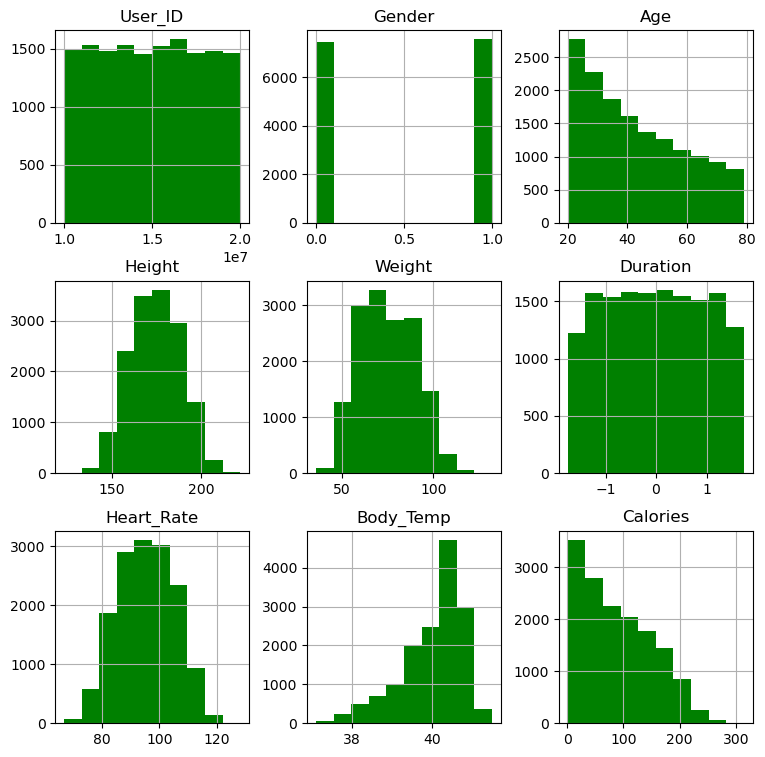

In [18]:
from matplotlib import pyplot
data.hist(color = "green", figsize = (9,9))

<h2 style="color:#800080">Gender Count using countplot</span>
</h2>

<ul style = "color:#8B0000;">
<li> Count plots takes "Target Column" as an argument which is a feature of the
dataset and it gives the respective count for each category in that feature. </li>
</ul>

<AxesSubplot:xlabel='Gender', ylabel='count'>

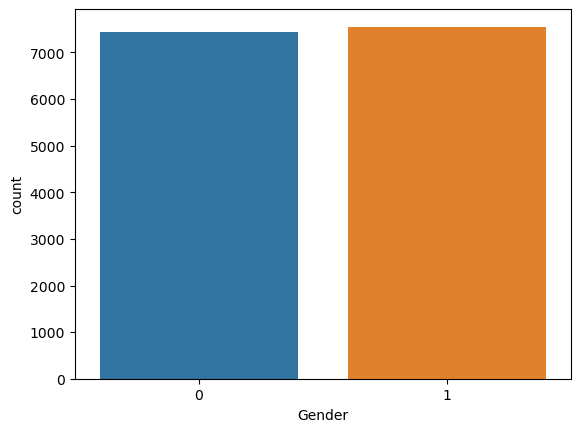

In [19]:
sb.countplot(data['Gender'])

<h2 style="color:#800080">Distribution of age,height,weight column using distplot</span>
</h2>

<ul style = "color:#8B0000;">
<li>A Distplot or distribution plot, depicts the variation in the data distribution</li>
<li>We Are Displaying displots for Columns "Age" , "Height" , "Weight"</li>
</ul>

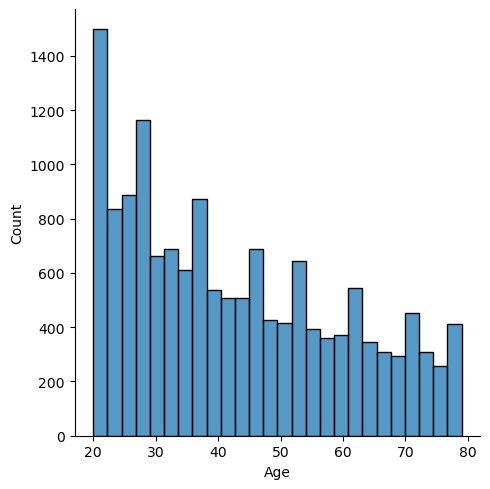

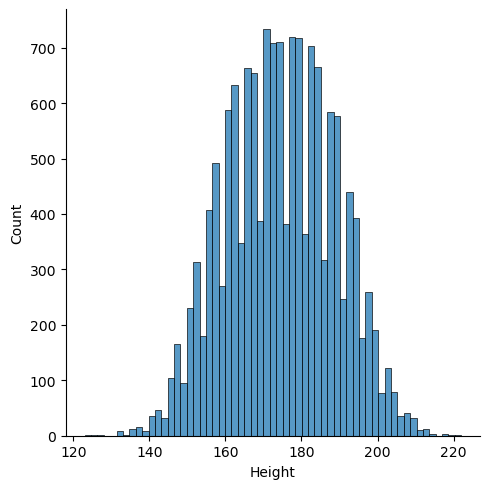

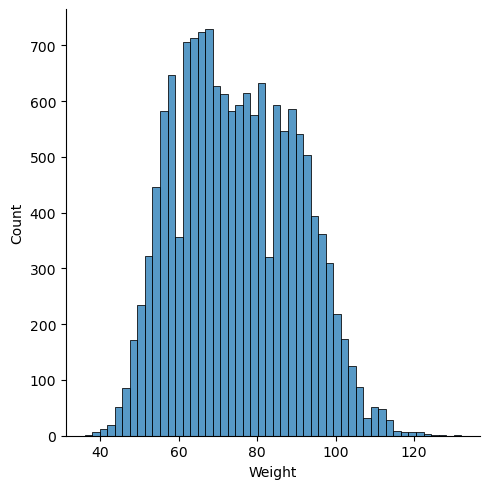

In [20]:
sb.displot(data['Age'])
sb.displot(data['Height'])
sb.displot(data['Weight'])

<h2 style="color:#800080">Box Plot</span>
</h2>

<ul style = "color:#8B0000;">
<li>Here We are Displaying Box Plots for each Column using data.plot() </li
</ul>

User_ID          AxesSubplot(0.125,0.653529;0.227941x0.226471)
Gender        AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Age           AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Height           AxesSubplot(0.125,0.381765;0.227941x0.226471)
Weight        AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Duration      AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Heart_Rate           AxesSubplot(0.125,0.11;0.227941x0.226471)
Body_Temp         AxesSubplot(0.398529,0.11;0.227941x0.226471)
Calories          AxesSubplot(0.672059,0.11;0.227941x0.226471)
dtype: object

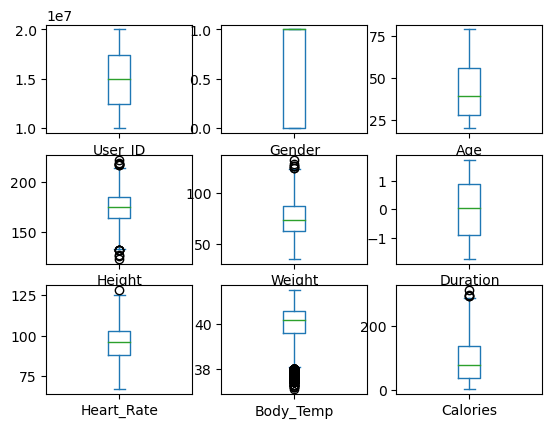

In [21]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False)

<h2 style="color:#800080">Density Plot</span>
</h2>

<ul style = "color:#8B0000;">
<li>Here We are Displaying Density Plots for Each Column </li
</ul>

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

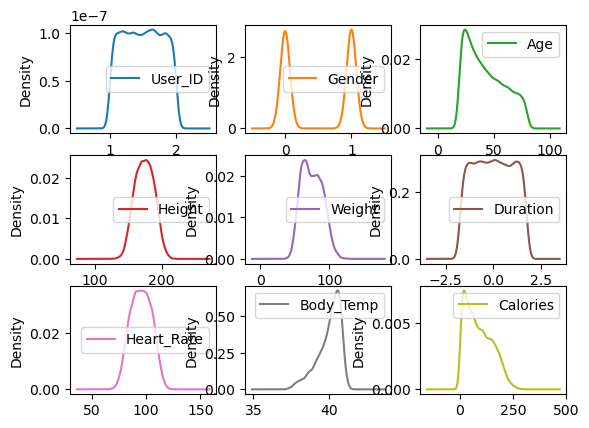

In [22]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

<ul style = "color:#8B0000;">
<li>Here We Have Imported 'scatter_matrix' from pandas.plotting</li
<li>Displayed Scatter Matrix for "Age" & "Calories"</li>
</ul>

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Calories', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Calories'>,
        <AxesSubplot:xlabel='Calories', ylabel='Calories'>]], dtype=object)

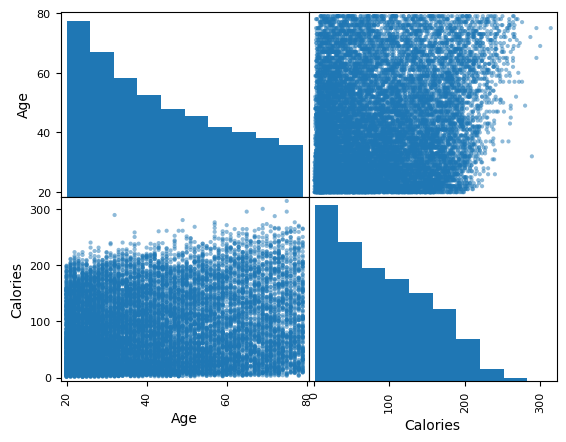

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Age','Calories']])

<font size="4">Pair plot</font>

<ul style = "color:#8B0000;">
<li>This graph Represents Pair wise Plot for each attribute for the atrributes ("Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender")</li
</ul>

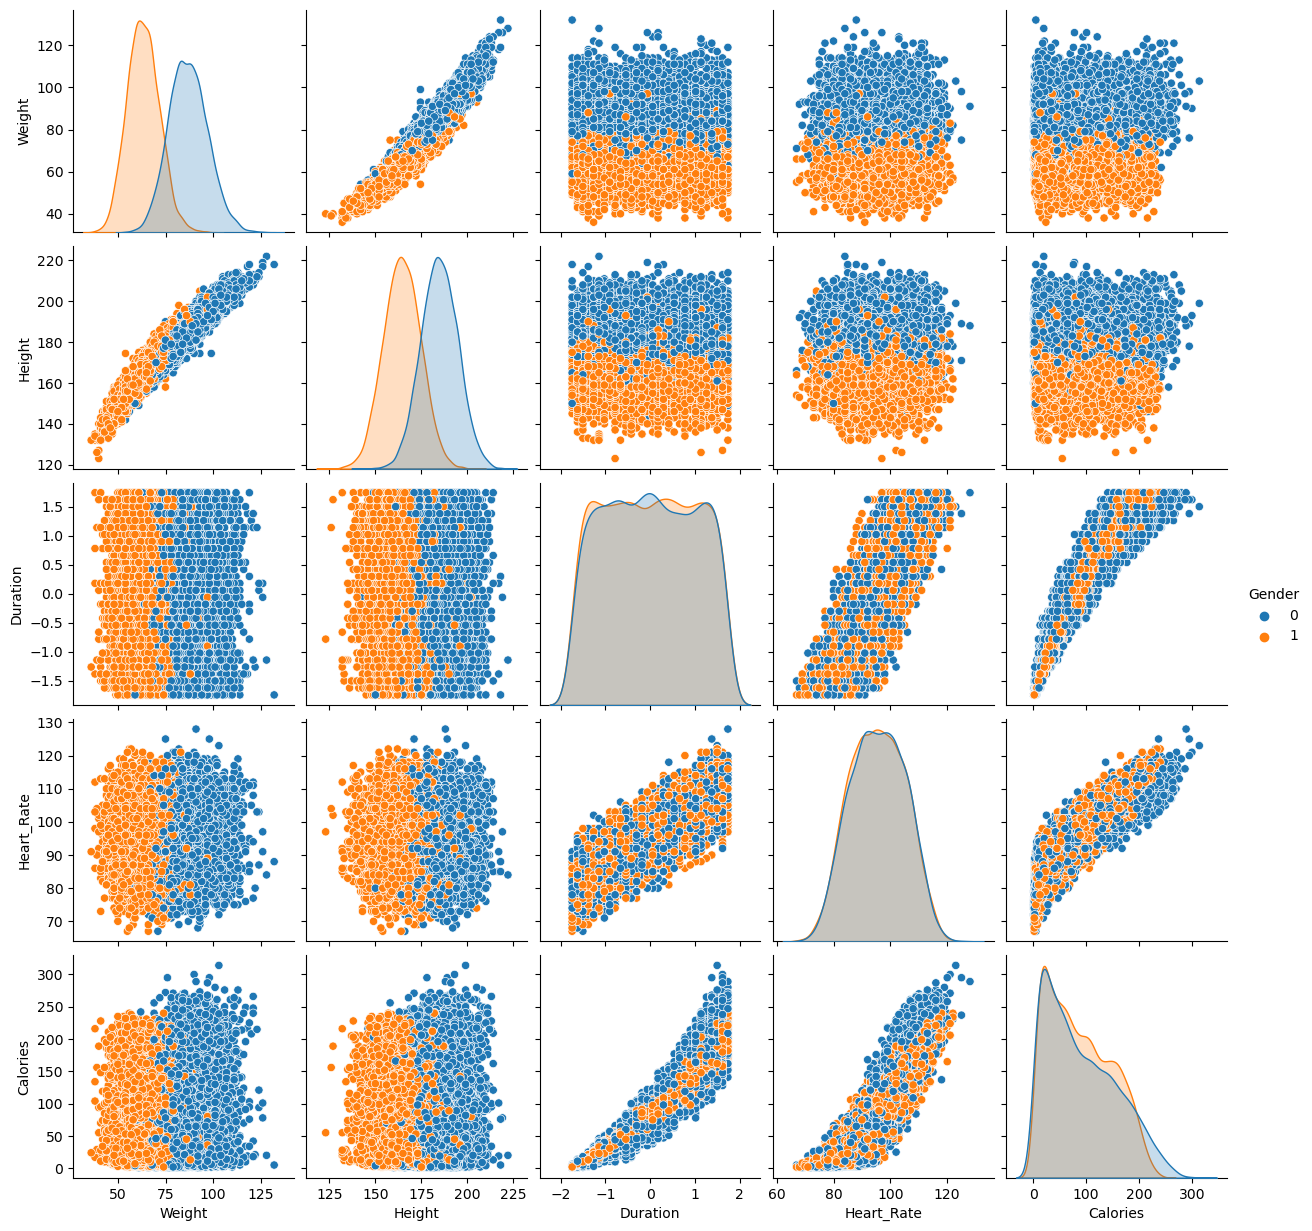

In [24]:
sb.pairplot(data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

<ul style = "color:#8B0000;">
<li>Initilaized a variable correlation with 'data.corr' </li>
<li>This shows pair-wise correlation of each attribute</li>
</ul>

In [25]:
correlation = data.corr()
correlation

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013570,-0.011692,-0.002751,-0.000457,0.000923,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710278,-0.783016,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009549,0.090237,0.013247,0.010482,0.013175,0.154395
Height,-0.013570,-0.710278,0.009549,1.000000,0.958054,-0.004638,0.000570,0.001145,0.017564
Weight,-0.011692,-0.783016,0.090237,0.958054,1.000000,-0.001972,0.004177,0.004044,0.035349
Duration,-0.002751,-0.003440,0.013247,-0.004638,-0.001972,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,-0.011555,0.010482,0.000570,0.004177,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,-0.007264,0.013175,0.001145,0.004044,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,-0.022357,0.154395,0.017564,0.035349,0.955421,0.897882,0.824558,1.000000


<ul style = "color:#8B0000;">
<li>For the above correlation data , we have displayed a Heatmap for it </li>
</ul>

<AxesSubplot:>

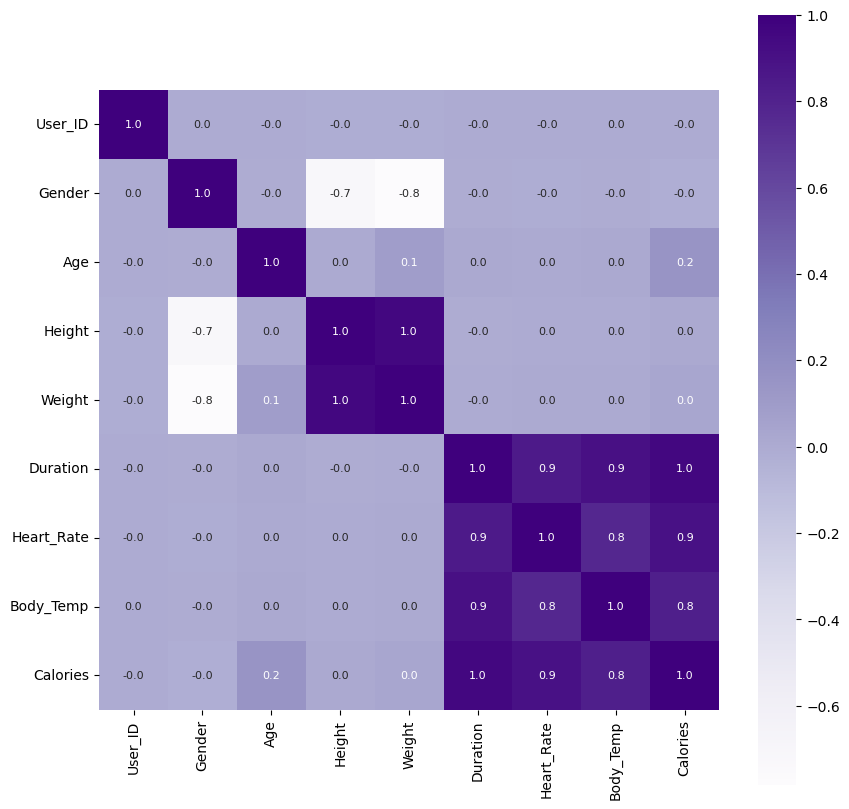

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

<ul style = "color:#8B0000;">
<li>This graph represents a displot , for column 'Age'</li>
</ul>

<AxesSubplot:xlabel='Age', ylabel='Density'>

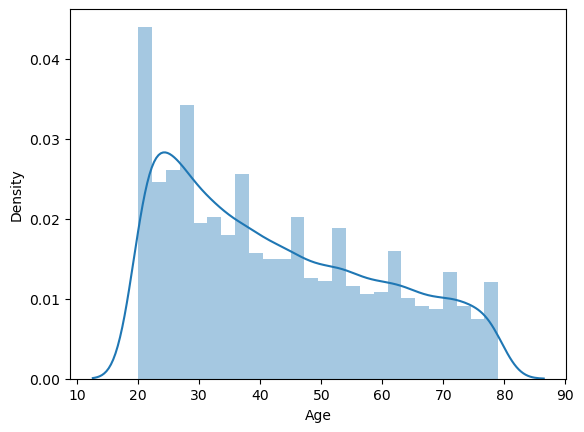

In [27]:
sns.distplot(data['Age'])

<ul style = "color:#8B0000;">
<li>This graph represents a displot , for column 'Height'</li>
</ul>

<AxesSubplot:xlabel='Height', ylabel='Density'>

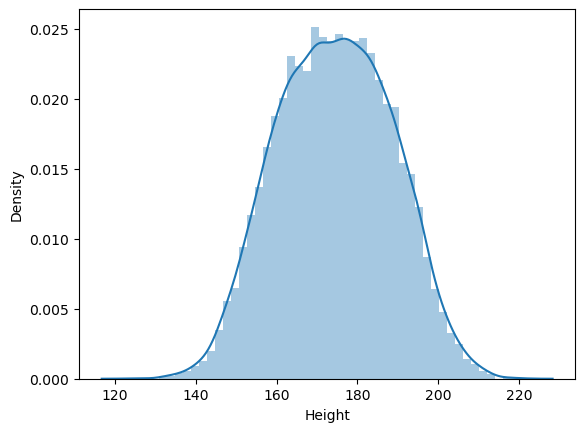

In [28]:
sns.distplot(data['Height'])

<ul style = "color:#8B0000;">
<li>This graph represents a displot , for column 'Weight'</li>
</ul>

<AxesSubplot:xlabel='Weight', ylabel='Density'>

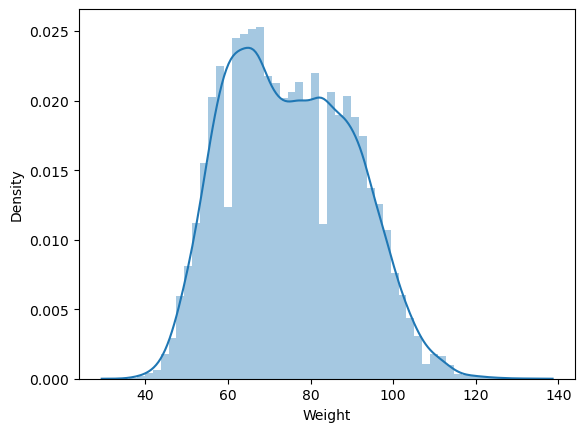

In [29]:
sns.distplot(data['Weight'])

<ul style = "color:#8B0000;">
<li>This graph represents a displot , for column 'Duration'</li>
</ul>

<AxesSubplot:xlabel='Duration', ylabel='Density'>

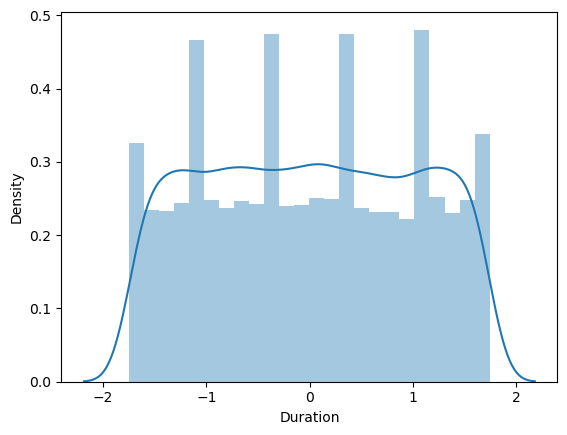

In [30]:
sns.distplot(data['Duration'])

<ul style = "color:#8B0000;">
<li>This graph represents a displot , for column 'Heart_Rate'</li>
</ul>

<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

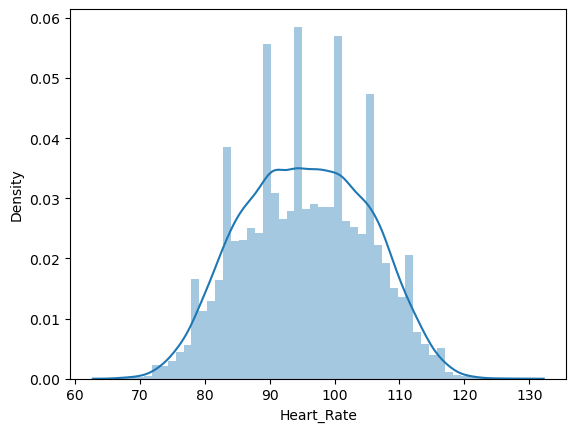

In [31]:
sns.distplot(data['Heart_Rate'])


<ul style = "color:#8B0000;">
<li>This graph represents a displot , for column 'Body_Temp'</li>
</ul>

<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

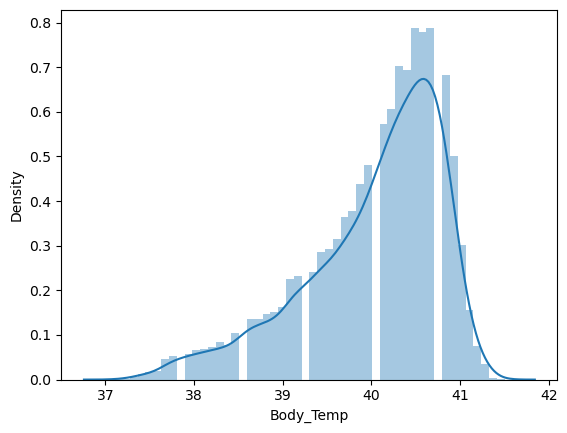

In [32]:
sns.distplot(data['Body_Temp'])


<h2 style="color:#800080">Seperation of features and target</span>
</h2>

<ul style = "color:#8B0000;">
<li>Initializing a Variable "X" with Datafram "data" and We are Droping Unwanted Feature "User_ID" and  a Target variable "Calories" from it.</li>
<li>Initializing a Variable "Y" with Target Variable</li>
</ul>

In [33]:
X=data.drop(['User_ID','Calories'],axis=1)
Y=data['Calories']

<ul style = "color:#8B0000;">
<li>We Are Printing the Value X</li>
</ul>

In [34]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.00000,1.619127,105,40.8
1,1,20,166.0,60.00000,-0.183990,94,40.3
2,0,69,179.0,79.00000,-1.265861,88,38.7
3,1,34,179.0,74.96638,-0.304198,100,40.5
4,1,27,154.0,58.00000,-0.664821,81,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.00000,-0.544614,92,40.4
14996,1,27,165.0,65.00000,-1.145653,85,39.2
14997,1,43,159.0,58.00000,0.056426,90,40.1
14998,0,78,193.0,97.00000,-1.626484,84,38.3


<ul style = "color:#8B0000;">
<li>We Are Printing the Value Y</li>
</ul>

In [35]:
Y

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64

<ul style = "color:#8B0000;">
<li>We Dividing the Dataframe into training testing and splitting</li>
    <li>where "80%" is used to Train the Model</li>
<li>where "20%" is used to Test the Model</li>
</ul>

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)


(15000, 7) (12000, 7) (3000, 7)


<ul style = "color:#8B0000;">
<li>We Are Printing the Value X_train</li>
</ul>

In [37]:
print(X_train)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1154        1   38   169.0    67.0 -1.506276          85       38.5
9804        0   30   194.0    96.0 -0.785029          91       39.6
7919        1   78   182.0    79.0 -1.025445          84       39.4
4854        0   50   171.0    77.0  1.619127         111       40.8
5947        1   32   172.0    66.0  1.619127         105       40.8
...       ...  ...     ...     ...       ...         ...        ...
11798       1   49   178.0    71.0 -0.424406          98       39.9
13896       1   67   159.0    58.0  0.897880         101       40.4
6637        1   25   167.0    64.0  0.537257         100       40.4
2575        1   36   167.0    64.0  1.498919         108       40.8
7336        0   30   187.0    88.0 -0.664821          94       40.2

[12000 rows x 7 columns]


<ul style = "color:#8B0000;">
<li>We Are Printing the Value X_test</li>
</ul>

In [38]:
print(X_test)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
7592        1   41   172.0    74.0  1.018088          98       40.8
3551        0   70   189.0    96.0  1.018088         113       40.9
9698        1   53   173.0    68.0 -1.025445          96       39.3
3759        0   36   191.0    96.0 -1.626484          82       38.4
2353        1   46   169.0    68.0  0.537257         111       40.6
...       ...  ...     ...     ...       ...         ...        ...
8859        1   20   161.0    60.0  1.619127         107       40.3
2886        1   40   152.0    49.0 -0.544614          87       39.8
14357       1   57   160.0    62.0  0.897880         103       40.2
9430        1   58   171.0    67.0 -1.145653          82       39.4
11870       1   62   175.0    70.0  0.176633          94       40.3

[3000 rows x 7 columns]


<ul style = "color:#8B0000;">
<li>We Are Printing the Value Y_train</li>
</ul>

In [39]:
print(Y_train)


1154      12
9804      37
7919      31
4854     222
5947     174
        ... 
11798     66
13896    145
6637     108
2575     180
7336      44
Name: Calories, Length: 12000, dtype: int64


<ul style = "color:#8B0000;">
<li>We Are Printing the Value Y_test</li>
</ul>

In [40]:
print(Y_test)


7592     127
3551     224
9698      38
3759       6
2353     137
        ... 
8859     177
2886      49
14357    145
9430      24
11870     90
Name: Calories, Length: 3000, dtype: int64


<h2 style="color:#800080">Model implementation and Prediction</span>
</h2>

<h3>Using Linear Regression</h3>

<ul style = "color:#8B0000;">

<li>We Are Training The Model Using Linear Regression , we have initialized variable "model1" with LinearRegression()</li>
<li>We are Fitting the model1 with data X_train and Y_train (i.e We are Training The Model with data)</li>
<li>Now We are Predicting our Model with X_test</li>
</ul>

In [41]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)
calories_burnt_prediction1 = model1.predict(X_test)
print(calories_burnt_prediction1)

[137.46055773 182.15817337  50.19268305 ... 157.55409814  16.5762304
 100.24581266]


<ul style = "color:#8B0000;">

<li>From sklearn.metrics we are Importing mean_squared_error</li>
<li>We are Calculating the Mean Square Error for the Trained Model</li>
</ul>

In [44]:
from sklearn.metrics import mean_squared_error
error1 = mean_squared_error(Y_test, calories_burnt_prediction1)
print(error1)

130.0907806852618


<h3>Using XGBregressor</h3>

<ul style = "color:#8B0000;">

<li>We Are Training The Model Using XGBRegressor , we have initialized variable "model1" with XGBRegressor()</li>
<li>We are Fitting the model1 with data X_train and Y_train (i.e We are Training The Model with data)</li>
<li>Now We are Predicting our Model with X_test</li>
</ul>

In [47]:
model2 = XGBRegressor()
model2.fit(X_train,Y_train)
calories_burnt_prediction2 = model2.predict(X_test)

<ul style = "color:#8B0000;">

<li>We are Calculating the Mean Square Error for the Trained Model</li>
</ul>

In [48]:
error2 = mean_squared_error(Y_test, calories_burnt_prediction2)
error2


4.526709739784019

<h3>Using KNN</h3>

<ul style = "color:#8B0000;">

<li>We Are Training The Model Using KNeighborsRegressor , we have initialized variable "model1" with KNeighborsRegressor()</li>
<li>We are Fitting the model1 with data X_train and Y_train (i.e We are Training The Model with data)</li>
<li>Now We are Predicting our Model with X_test</li>
</ul>

In [49]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor(n_neighbors=13)
model3.fit(X_train,Y_train)
calories_burnt_prediction3 = model3.predict(X_test)
calories_burnt_prediction3

array([ 94.38461538, 249.30769231,  81.76923077, ..., 155.07692308,
        17.53846154,  79.        ])

<ul style = "color:#8B0000;">

<li>We are Calculating the Mean Square Error for the Trained Model</li>
</ul>

In [50]:
error3 = mean_squared_error(Y_test, calories_burnt_prediction3)
error3

470.9177455621301

<h3>KNN for different values of K</h3>

<ul style = "color:#8B0000;">

<li>We Are Taking different values of k from range 3 to 16 </li>
<li>We are calculating and plotting the graph , Displayed different colors for the values</li>
</ul>

<BarContainer object of 7 artists>

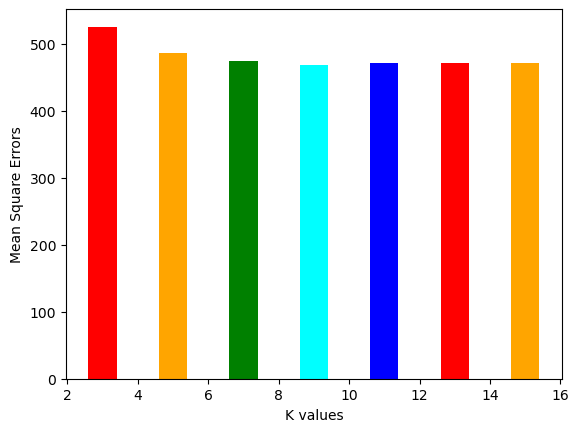

In [51]:
k_values = []
K_MSE = []
for k in range(3 , 16 , 2):
    k_values.append(k)
    model3 = KNeighborsRegressor(n_neighbors=k)
    model3.fit(X_train,Y_train)
    calories_burnt_prediction3 = model3.predict(X_test)
    error3 = mean_squared_error(Y_test, calories_burnt_prediction3)
    K_MSE.append(error3)
plt.xlabel("K values")
plt.ylabel("Mean Square Errors")
plt.bar(k_values , K_MSE , color=["red","orange","green" , "cyan" , "blue"])

<h3>Using SVM</h3>

<ul style = "color:#8B0000;">

<li>We Are Training The Model Using Support Vector Machine , we have initialized variable "model1" with SVR()</li>
<li>We are Fitting the model1 with data X_train and Y_train (i.e We are Training The Model with data)</li>
<li>Now We are Predicting our Model with X_test</li>
</ul>

In [52]:
from sklearn import svm 
model4 = svm.SVR(kernel = "linear")
model4.fit(X_train,Y_train)
calories_burnt_prediction4 = model4.predict(X_test)
calories_burnt_prediction4

array([135.20298641, 173.7759472 ,  48.34792828, ..., 153.19470055,
        16.91190451,  97.8024909 ])

<ul style = "color:#8B0000;">

<li>We are Calculating the Mean Square Error for the Trained Model</li>
</ul>

In [53]:
error4 = mean_squared_error(Y_test, calories_burnt_prediction4)
error4

142.46627122650318

<h3>Random forest Regressor</h3>

<ul style = "color:#8B0000;">

<li>We Are Training The Model Using RandomForestRegressor , we have initialized variable "model1" with RandomForestRegressor()</li>
<li>We are Fitting the model1 with data X_train and Y_train (i.e We are Training The Model with data)</li>
<li>Now We are Predicting our Model with X_test</li>
</ul>

In [54]:
from sklearn.ensemble import RandomForestRegressor

# define used regressor
model5=RandomForestRegressor(n_estimators=20, max_depth=10, criterion='mse')

# train model
model5.fit(X_train,Y_train)

RandomForestRegressor(criterion='mse', max_depth=10, n_estimators=20)

In [55]:
calories_burnt_prediction5 = model5.predict(X_test)
print(calories_burnt_prediction5)

[132.11950617 227.16487026  36.36589745 ... 145.56347436  24.49304534
  88.65437779]


<ul style = "color:#8B0000;">

<li>We are Calculating the Mean Square Error for the Trained Model</li>
</ul>

In [56]:
error5 = mean_squared_error(Y_test, calories_burnt_prediction5)
print(error5)


12.957421512092605


<h3>Evaluating performance using mean square error</h3>

<ul style = "color:#8B0000;">

<li>We Had Put a Label on  x-axis as Model Used</li>
<li>We Had Put a Label on  y-axis as Mean Square Error</li>
<li>Created a Variable - 'model_names' , this contains the names of models that are to be plotted</li>
<li>Created a Variable - 'errors' , this contains the errors of each model</li>
<li>Plotting the Different Models Based on Errors with Different colors </li>
</ul>

<BarContainer object of 5 artists>

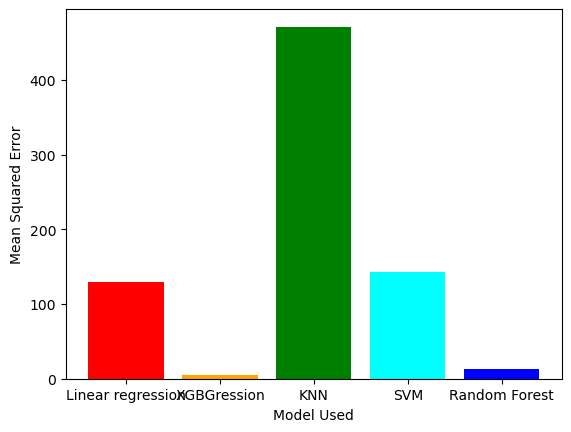

In [60]:
plt.xlabel("Model Used")
plt.ylabel("Mean Squared Error")
model_NAMES = ["Linear regression" , "XGBGression" , "KNN" , "SVM" , "Random Forest"]
errors = [error1 , error2 , error3 , error4 , error5]
plt.bar(model_NAMES , errors , color=["red","orange","green" , "cyan" , "blue"])

<ul style = "color:#8B0000;">

<li>This Code Snippit also does the same as above </li>
<li>This Graph plots for all the models above except KNN For Better Visualization </li>
</ul>

<BarContainer object of 4 artists>

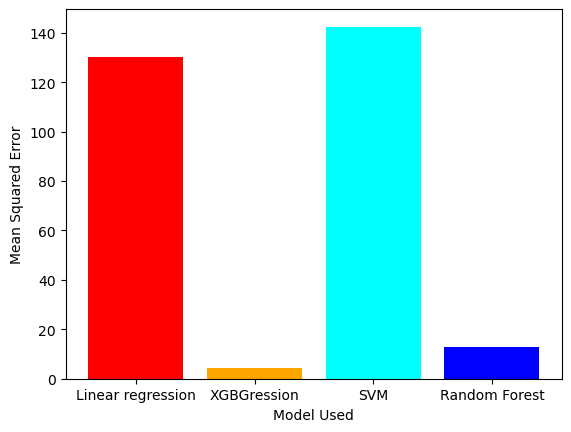

In [58]:
plt.xlabel("Model Used")
plt.ylabel("Mean Squared Error")
model_NAMES = ["Linear regression" , "XGBGression" , "SVM" , "Random Forest"]
errors = [error1 , error2 , error4 , error5]
plt.bar(model_NAMES , errors , color=["red","orange", "cyan" , "blue"])

<h3>Evaluating performace using K Fold Cross Validation</h3>

LinearRegression()
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
KNeighborsRegressor(n_neighbors=15)
SVR(kernel='linear')
RandomForestRegressor(criterion='mse', max_depth=10, n_estimators=20)
[0.9671425924520193, 0.9988222198730229, 0.8749411296004362, 0.9644598944787063, 0.9964741997263376]


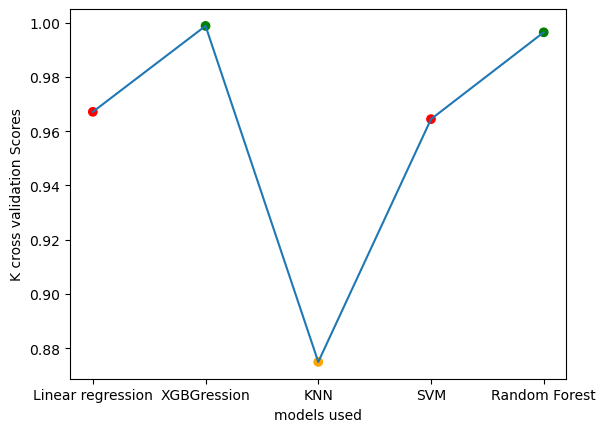

In [61]:
from sklearn.model_selection import KFold,cross_val_score
accuracy = []
models = [model1 , model2 , model3 , model4 , model5]
modelScores = []
for model in models:
    print(model)
    kfold_validation = KFold(5)
    ValidationResult = cross_val_score(model , X , Y , cv=kfold_validation)
    modelScores.append(np.mean(ValidationResult))
print(modelScores)
plt.ylabel("K cross validation Scores")
plt.xlabel("models used")
plt.plot(model_NAMES,modelScores)
plt.scatter(model_NAMES , modelScores , color = ['red' , 'green' , 'orange' , 'red' ,'green' ])

<h1 style="color:#00008B">CONCLUSION</h1>
<p> </p>
<ul style = "color:#8B0000;">
  <li>By help of this project we can determine how many calories a person has burnt depending on certain attributes like duration of work out and body_temp and so on.We have done all the required things like data preprocessing for cleaning the data data visualization for understanding the data and also we applied severeal algorithms to predict how many calories are burnt. After applying several algorithms we found that KGBression is best suited for our dataset since it has least error in it.</li>
</ul>
<h1 style="color:#00008B">                                            THANK YOU</h1>
<p> </p>.